In [1]:
from mesh_lib import *

from VPINN_tri_final_batch import *

from PROBDEF import PROBDEF
#kjsdhkjsdahfkjsh

2023-11-24 06:42:23.241272: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-24 06:42:24.344169: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



my_types lib imported


interpolator_lib imported

settings_lib imported 


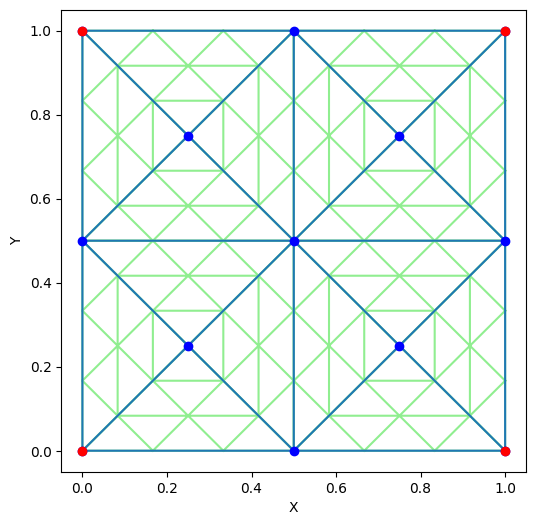

In [2]:
#seed
initializer=tf.keras.initializers.GlorotUniform(seed=42)


domain=((0,0),(1,0),(1,1),(0,1))

mesh = Mesh(domain, H = 0.1, N = 4)
mesh.plot_sub_mesh()

In [3]:
#network bulding 


#glorot uniform is the key 
model = tfk.models.Sequential()
model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

2023-11-24 06:42:27.016142: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-24 06:42:27.093136: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-24 06:42:27.093829: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-24 06:42:27.097260: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-24 06:42:27.097944: I tensorflow/compile

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________


In [5]:
params = {'scheme': 'VPINNs',
            'n_quad': 50,
            'n_bound': 100, # points inside every edge,so in total you will have 80*4 +4 boundary points 
            'iter': 1000 ,
            'n_test':2}

In [6]:
pb=PROBDEF()

degree =  2  , local dof =  6  internal dof =  0  points inside each edge =  1
[[0 0]
 [1 0]
 [0 1]
 [1/2 0]
 [1/2 1/2]
 [0 1/2]]


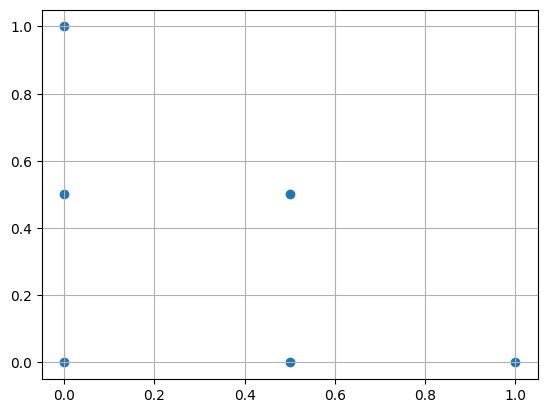

degree =  2  , local dof =  6  internal dof =  0  points inside each edge =  1
[[0 0]
 [1 0]
 [0 1]
 [1/2 0]
 [1/2 1/2]
 [0 1/2]]


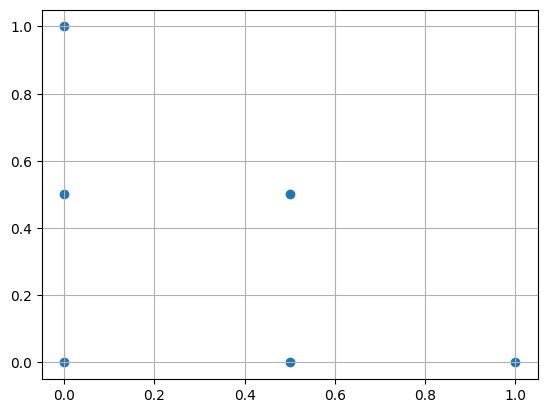

In [7]:
vp=VPINN(pb,params,mesh,model)

In [8]:
#training 
history=vp.train(10000)


2023-11-24 06:42:34.523228: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_1_grad/StatefulPartitionedCall_1_82' with dtype int32 and shape [2]
	 [[{{node gradients/StatefulPartitionedCall_1_grad/StatefulPartitionedCall_1_82}}]]
2023-11-24 06:42:34.523481: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_1_grad/StatefulPartitionedCall_1_115' with dtype int32 and shape [2]
	 [[{{node gradients/StatefulPartitionedCall_1_grad/StatefulPartitionedCall_1_115}}]]
2023-11-24 06:42:34.523590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DE

2023-11-24 06:42:53.596096: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_1_grad/StatefulPartitionedCall_1_82' with dtype int32 and shape [2]
	 [[{{node gradients/StatefulPartitionedCall_1_grad/StatefulPartitionedCall_1_82}}]]
2023-11-24 06:42:53.596305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_1_grad/StatefulPartitionedCall_1_115' with dtype int32 and shape [2]
	 [[{{node gradients/StatefulPartitionedCall_1_grad/StatefulPartitionedCall_1_115}}]]
2023-11-24 06:42:53.596469: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DE

2023-11-24 06:42:56.400375: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_1_grad/StatefulPartitionedCall_1_82' with dtype int32 and shape [2]
	 [[{{node gradients/StatefulPartitionedCall_1_grad/StatefulPartitionedCall_1_82}}]]
2023-11-24 06:42:56.400529: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/StatefulPartitionedCall_1_grad/StatefulPartitionedCall_1_115' with dtype int32 and shape [2]
	 [[{{node gradients/StatefulPartitionedCall_1_grad/StatefulPartitionedCall_1_115}}]]
2023-11-24 06:42:56.400679: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DE

Iteration: 0 loss: 0.3593975199 time: 50.994481325149536
Iteration: 10 loss: 0.2228581776 time: 4.349870681762695
Iteration: 20 loss: 0.1418651314 time: 4.264862298965454
Iteration: 30 loss: 0.0927699416 time: 2.907628059387207
Iteration: 40 loss: 0.0426687432 time: 2.8977956771850586
Iteration: 50 loss: 0.0501414268 time: 3.2494635581970215
Iteration: 60 loss: 0.0616459931 time: 2.90797758102417
Iteration: 70 loss: 0.0539934164 time: 3.212942361831665
Iteration: 80 loss: 0.0519369565 time: 3.2252254486083984
Iteration: 90 loss: 0.0402838398 time: 3.5040721893310547
Iteration: 100 loss: 0.0280584580 time: 3.3103187084198
Iteration: 110 loss: 0.0119857590 time: 3.288795232772827
Iteration: 120 loss: 0.0402889466 time: 3.3996365070343018
Iteration: 130 loss: 0.0099443026 time: 4.706915378570557
Iteration: 140 loss: 0.0070105082 time: 3.7437262535095215
Iteration: 150 loss: 0.0055888736 time: 3.443643808364868
Iteration: 160 loss: 0.0034823310 time: 4.57024359703064
Iteration: 170 loss: 0

KeyboardInterrupt: 

In [9]:
iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 100 iterations

plt.plot(iterations, history, marker='o')
plt.title('Loss Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

NameError: name 'history' is not defined

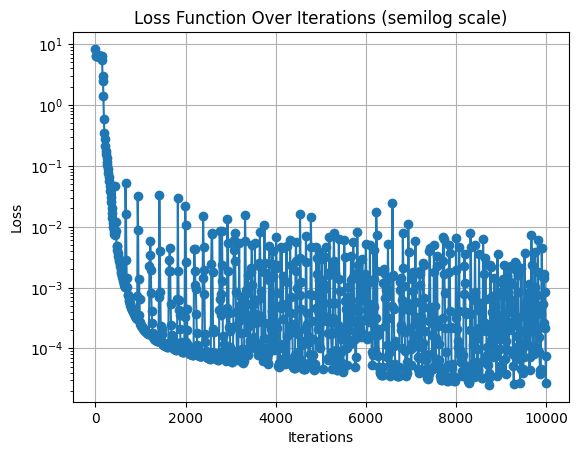

In [ ]:
plt.semilogy(iterations, history, marker='o')
plt.title('Loss Function Over Iterations (semilog scale)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()
plt.show()

In [10]:
x=np.linspace(0,1,100,dtype=np.float32)

def u_exact(x,y):

    return np.cos(2*np.pi*x)*np.sin(2*np.pi*y)


eval_exact=[u_exact(x[i],0.80) for i in range(len(x))]

eval_net=[vp.u_NN(x[i],0.80) for i in range(len(x))]

eval_exact=np.array(eval_exact)
eval_net=np.array(eval_net)

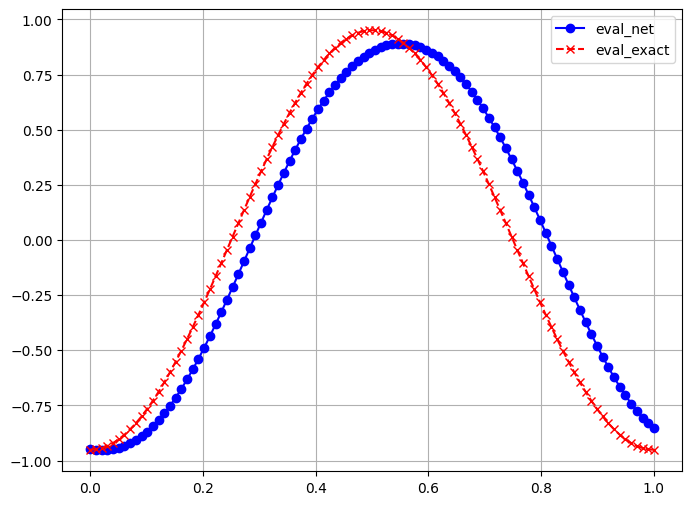

In [11]:
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the data
plt.plot(x, eval_net, label='eval_net', linestyle='-', marker='o', color='b')
plt.plot(x, eval_exact, label='eval_exact', linestyle='--', marker='x', color='r')
plt.grid()
plt.legend()

#if you want reproducibility put a seed

In [ ]:
#integration
"""from scipy.integrate import dblquad
integral,error=dblquad(lambda x,y: (u_exact(x,y)-vp.u_NN(x,y))**2, 0.0, 1.0,0.0, 1.0)

L2_error=np.sqrt(integral)
print(L2_error,error)"""

'from scipy.integrate import dblquad\nintegral,error=dblquad(lambda x,y: (u_exact(x,y)-vp.u_NN(x,y))**2, 0.0, 1.0,0.0, 1.0)\n\nL2_error=np.sqrt(integral)\nprint(L2_error,error)'

In [12]:
## Add surface plot
import numpy as np
x=np.linspace(0,1,50,dtype=np.float32)
XX,YY = np.meshgrid(x,x)
xx = XX.flatten()
yy = YY.flatten()

X = np.vstack((xx,yy)).transpose()
print(X)
Z = [vp.u_NN(x[0],x[1]) for x in X]

[[0.         0.        ]
 [0.02040816 0.        ]
 [0.04081633 0.        ]
 ...
 [0.9591837  1.        ]
 [0.97959185 1.        ]
 [1.         1.        ]]


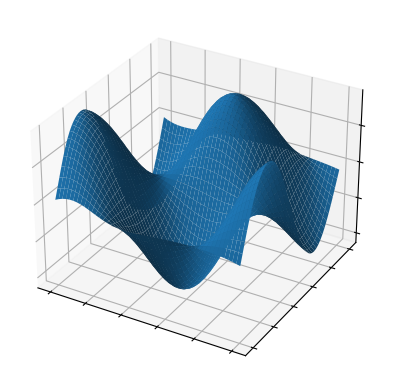

Text(0.5, 0.92, 'Original Code')

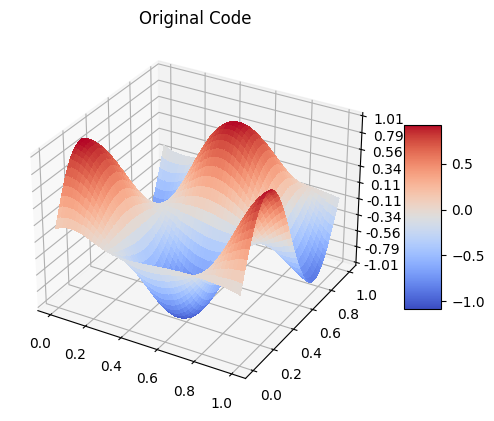

In [13]:
# Plot the surface
z = np.array(Z).flatten().reshape((50,50))
# z = np.reshape(z, (50,50))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(XX, YY, z, vmin=z.min() * 2)

ax.set(xticklabels=[],
       yticklabels=[],
       zticklabels=[])

plt.show()

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(XX, YY, z, rstride=1, cstride=1, cmap=cm.coolwarm,
    linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('Original Code')